In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [76]:
mydata= pd.read_csv('/content/sample_data/fraud07.csv')
mydata.head(10)

,trans_datetime,merchant,category,amt,gender,state,job,trans_num,is_fraud
0,1/1/2019 0:00,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,NC,"Psychologist, counselling",0b242abb623afc578575680df30655b9,0
1,1/1/2019 0:00,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,WA,Special educational needs teacher,1f76529f8574734946361c461b024d99,0
2,1/1/2019 0:00,fraud_Lind-Buckridge,entertainment,220.11,M,ID,Nature conservation officer,a1a22d70485983eac12b5b88dad1cf95,0
3,1/1/2019 0:01,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,MT,Patent attorney,6b849c168bdad6f867558c3793159a81,0
4,1/1/2019 0:03,fraud_Keeling-Crist,misc_pos,41.96,M,VA,Dance movement psychotherapist,a41d7549acf90789359a9aa5346dcb46,0
5,1/1/2019 0:04,"fraud_Stroman, Hudson and Erdman",gas_transport,94.63,F,PA,Transport planner,189a841a0a8ba03058526bcfe566aab5,0
6,1/1/2019 0:04,fraud_Rowe-Vandervort,grocery_net,44.54,F,KS,Arboriculturist,83ec1cc84142af6e2acf10c44949e720,0
7,1/1/2019 0:05,fraud_Corwin-Collins,gas_transport,71.65,M,VA,"Designer, multimedia",6d294ed2cc447d2c71c7171a3d54967c,0
8,1/1/2019 0:05,fraud_Herzog Ltd,misc_pos,4.27,F,PA,Public affairs consultant,fc28024ce480f8ef21a32d64c93a29f5,0
9,1/1/2019 0:06,"fraud_Schoen, Kuphal and Nitzsche",grocery_pos,198.39,F,TN,Pathologist,3b9014ea8fb80bd65de0b1463b00b00e,0


In [77]:
print(mydata.shape)

(1051, 9)


In [78]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1051 entries, 0 to 1050
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   trans_datetime  1051 non-null   object 
 1   merchant        1051 non-null   object 
 2   category        1051 non-null   object 
 3   amt             1051 non-null   float64
 4   gender          1051 non-null   object 
 5   state           1051 non-null   object 
 6   job             1051 non-null   object 
 7   trans_num       1051 non-null   object 
 8   is_fraud        1051 non-null   int64  
dtypes: float64(1), int64(1), object(7)
memory usage: 74.0+ KB


In [79]:
mydata['is_fraud'].value_counts()

is_fraud
0    1029
1      22
Name: count, dtype: int64

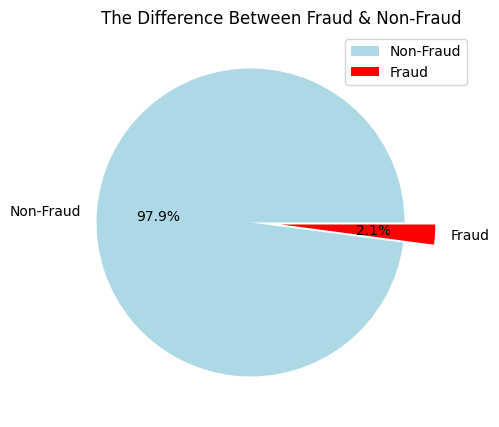

In [80]:
labels = ['Non-Fraud', 'Fraud']
colors = ['lightblue', 'red']
size = [1029, 22]
explode = [0.2, 0]

plt.rcParams['figure.figsize'] = (5,5)
plt.pie(size, labels = labels, colors = colors, explode = explode, autopct='%1.1f%%')
plt.axis('off')
plt.title('The Difference Between Fraud & Non-Fraud',fontsize = 12)
plt.legend()
plt.show()

In [81]:
dataFraud = mydata[mydata['is_fraud'] == 1]
dataNonFraud = mydata[mydata['is_fraud'] == 0]

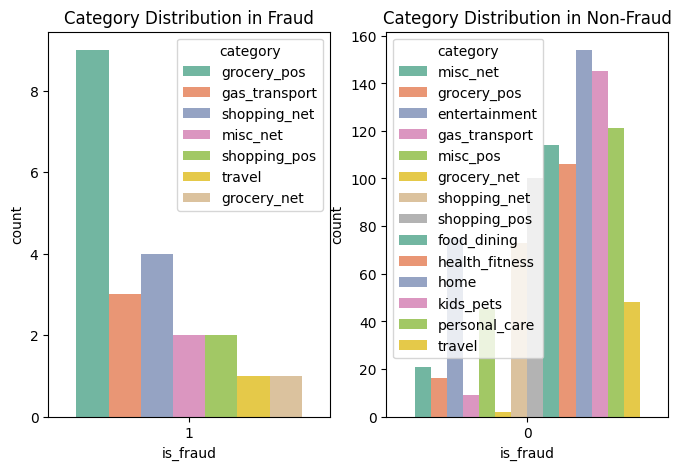

In [85]:
import seaborn as sns
plt.figure(figsize=(8,5))
plt.subplot(121)
sns.countplot(x='is_fraud',hue='category',data=dataFraud, palette = 'Set2')
plt.title("Category Distribution in Fraud")
plt.subplot(122)
sns.countplot(x='is_fraud',hue='category',data=dataNonFraud, palette = 'Set2')
plt.title("Category Distribution in Non-Fraud")
plt.show()

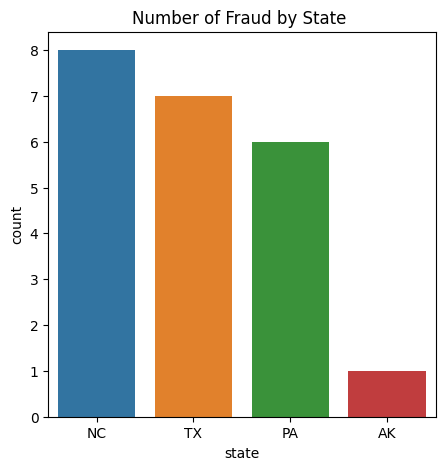

In [86]:
sns.countplot(data=mydata[mydata['is_fraud']==1],x='state', hue='state')
plt.title("Number of Fraud by State ")
plt.show()

In [87]:
all_features = [name for name in mydata.columns if mydata[name].dtype == 'object']
all_features

['trans_datetime',
 'merchant',
 'category',
 'gender',
 'state',
 'job',
 'trans_num']

In [88]:
all_features=[name for name in mydata.columns if mydata[name].dtype =='object']
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in list(all_features):
  mydata[i]=le.fit_transform(mydata[i])
for x in all_features:
  print(x," = ",mydata[x].unique())


trans_datetime  =  [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241

In [89]:
mydata.head(10)

,trans_datetime,merchant,category,amt,gender,state,job,trans_num,is_fraud
0,0,348,8,4.97,0,26,266,43,0
1,0,171,4,107.23,0,46,308,115,0
2,0,266,0,220.11,1,12,218,648,0
3,1,244,2,45.00,1,25,236,416,0
4,2,206,9,41.96,1,44,74,664,0
5,3,407,2,94.63,0,37,350,88,0
6,3,360,3,44.54,0,15,17,526,0
7,4,81,2,71.65,1,44,82,420,0
8,4,176,9,4.27,0,37,271,1034,0
9,5,381,4,198.39,0,41,237,228,0


In [92]:
X = mydata.drop('is_fraud',axis=1)
y = mydata['is_fraud']

print("Shape of x: ", X.shape)
print("Shape of y: ", y.shape)

Shape of x:  (1051, 8)
Shape of y:  (1051,)


In [93]:
#oversampling
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_new, y_new = sm.fit_resample(X, y)
print(f'''Shape of X before SMOTE: {X.shape}
Shape of X after SMOTE: {X_new.shape}''')
print('\nBalance of lung cancer and normal (%):')
y_new.value_counts(normalize=True) * 100

Shape of X before SMOTE: (1051, 8)
Shape of X after SMOTE: (2058, 8)

Balance of lung cancer and normal (%):


is_fraud
0    50.0
1    50.0
Name: proportion, dtype: float64

In [94]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.3, random_state=1) #70:30
modelGBT = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=3,random_state=0)
modelGBT= modelGBT.fit(X_train, y_train)

In [95]:
predictions = modelGBT.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
print(accuracy_score(y_test, predictions))


[[300   7]
 [  0 311]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       307
           1       0.98      1.00      0.99       311

    accuracy                           0.99       618
   macro avg       0.99      0.99      0.99       618
weighted avg       0.99      0.99      0.99       618

0.988673139158576


In [110]:
from sklearn.neighbors import KNeighborsClassifier
modelKNN= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )
modelKNN.fit(X_train, y_train)

KNeighborsClassifier()

In [115]:
predictions = modelKNN.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
print(accuracy_score(y_test, predictions))

[[291  16]
 [  0 311]]
              precision    recall  f1-score   support

           0       1.00      0.95      0.97       307
           1       0.95      1.00      0.97       311

    accuracy                           0.97       618
   macro avg       0.98      0.97      0.97       618
weighted avg       0.98      0.97      0.97       618

0.9741100323624595


In [106]:
test_fraud= pd.read_csv('/content/sample_data/testfraud07.csv')
test_fraud.head(10)


,trans_datetime,merchant,category,amt,gender,state,job,trans_num
0,0,5,4,4.97,0,4,6,0
1,0,0,3,107.23,0,8,7,2
2,0,3,0,220.11,1,1,4,5
3,1,2,1,45.00,1,3,5,3
4,2,1,5,41.96,1,7,2,7
5,3,8,1,94.63,0,5,8,1
6,3,6,2,44.54,0,2,1,4
7,4,4,3,274.09,0,6,3,8
8,5,7,2,14.37,1,0,0,6


In [107]:
test_predict = modelGBT.predict(X=test_fraud)
print(test_predict) #2 คลาสสุดท้ายผิดต้องเป็น 1

[0 0 0 0 0 0 0 0 0]
